# Machine Learning Group Assignment - Project 6: Santander Bank

Banco Santander is a retail and commercial bank based in Spain. Under their current system, a small number of Santander’s customers receive many recommendations while many others rarely see any resulting in an uneven customer experience. How to identify which products their existing customers actually like?

## 1) Reading the data

#### 1.1) Importing thr libaries

In [2]:
import numpy as np
import pandas as pd

#### 1.2) Loading the dataset

In [3]:
df = pd.read_csv("May16_data.csv", low_memory=False)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-05-28,657640,N,ES,H,68,2006-11-17,0.0,114,1.0,NaN,1,I,S,N,NaN,KAQ,N,1.0,28.0,MADRID,0.0,147347.97,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2016-05-28,657788,N,ES,H,42,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KBF,N,1.0,28.0,MADRID,1.0,132559.35,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2016-05-28,657795,N,ES,V,44,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KAP,N,1.0,26.0,"RIOJA, LA",1.0,81399.57,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2016-05-28,657790,N,ES,V,42,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KBF,N,1.0,48.0,BIZKAIA,1.0,NaN,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0,1.0,1
4,2016-05-28,657794,N,ES,H,49,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,8.0,BARCELONA,1.0,102189.00,01 - TOP,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## 2) Renaming the columns

In [5]:
# Renaming the columns for better readability

column_name_mapping = {
    'fecha_dato': 'date',
    'ncodpers': 'customer_code',
    'ind_empleado': 'employee_index',
    'pais_residencia': 'country_residence',
    'sexo': 'sex',
    'age': 'age',
    'fecha_alta': 'account_open_date',
    'ind_nuevo': 'new_customer_index',
    'antiguedad': 'seniority_months',
    'indrel': 'customer_relation_type',
    'ult_fec_cli_1t': 'last_primary_customer_date',
    'indrel_1mes': 'customer_type_beginning_month',
    'tiprel_1mes': 'customer_relation_type_beginning_month',
    'indresi': 'residence_index',
    'indext': 'foreigner_index',
    'conyuemp': 'spouse_index',
    'canal_entrada': 'channel_used',
    'indfall': 'deceased_index',
    'tipodom': 'address_type',
    'cod_prov': 'province_code',
    'nomprov': 'province_name',
    'ind_actividad_cliente': 'activity_index',
    'renta': 'household_income',
    'segmento': 'segment',
    'ind_ahor_fin_ult1': 'saving_account',
    'ind_aval_fin_ult1': 'guarantees',
    'ind_cco_fin_ult1': 'current_accounts',
    'ind_cder_fin_ult1': 'derivada_account',
    'ind_cno_fin_ult1': 'payroll_account',
    'ind_ctju_fin_ult1': 'junior_account',
    'ind_ctma_fin_ult1': 'mas_particular_account',
    'ind_ctop_fin_ult1': 'particular_account',
    'ind_ctpp_fin_ult1': 'particular_plus_account',
    'ind_deco_fin_ult1': 'short_term_deposits',
    'ind_deme_fin_ult1': 'medium_term_deposits',
    'ind_dela_fin_ult1': 'long_term_deposits',
    'ind_ecue_fin_ult1': 'e_account',
    'ind_fond_fin_ult1': 'funds',
    'ind_hip_fin_ult1': 'mortgage',
    'ind_plan_fin_ult1': 'pensions',
    'ind_pres_fin_ult1': 'loans',
    'ind_reca_fin_ult1': 'taxes',
    'ind_tjcr_fin_ult1': 'credit_card',
    'ind_valo_fin_ult1': 'securities',
    'ind_viv_fin_ult1': 'home_account',
    'ind_nomina_ult1': 'payroll',
    'ind_nom_pens_ult1': 'pensions_2',
    'ind_recibo_ult1': 'direct_debit'
}

df.rename(columns=column_name_mapping, inplace=True)

In [6]:
santander = df.copy()
santander.head()

,date,customer_code,employee_index,country_residence,sex,age,account_open_date,new_customer_index,seniority_months,customer_relation_type,last_primary_customer_date,customer_type_beginning_month,customer_relation_type_beginning_month,residence_index,foreigner_index,spouse_index,channel_used,deceased_index,address_type,province_code,province_name,activity_index,household_income,segment,saving_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions_2,direct_debit
0,2016-05-28,657640,N,ES,H,68,2006-11-17,0.0,114,1.0,NaN,1,I,S,N,NaN,KAQ,N,1.0,28.0,MADRID,0.0,147347.97,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2016-05-28,657788,N,ES,H,42,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KBF,N,1.0,28.0,MADRID,1.0,132559.35,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2016-05-28,657795,N,ES,V,44,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KAP,N,1.0,26.0,"RIOJA, LA",1.0,81399.57,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2016-05-28,657790,N,ES,V,42,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KBF,N,1.0,48.0,BIZKAIA,1.0,NaN,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0,1.0,1
4,2016-05-28,657794,N,ES,H,49,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,8.0,BARCELONA,1.0,102189.00,01 - TOP,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## 3) Data cleaning

#### 3.3) Handeling NaN values 

In [7]:
# Drop rows with missing values in specific columns
columns_to_check = ['sex', 'channel_used', 'province_code', 'customer_type_beginning_month',
                   'customer_relation_type_beginning_month', 'province_name', 'segment']

santander = santander.dropna(subset=columns_to_check)

# Drop the 'spouse_index' column as it has to many missing values (nearly 95%)
santander = santander.drop(columns=['spouse_index'])

# Drop the 'last_primary_customer_date' column as it has to many missing values (roughly 30%)
santander = santander.drop(columns=['last_primary_customer_date'])

# We can drop the province_name colum as we have a numeric variable called province_code for it
santander = santander.drop(columns=['province_name'])

##### 3.3.1) Handeling the household_income column as an exception

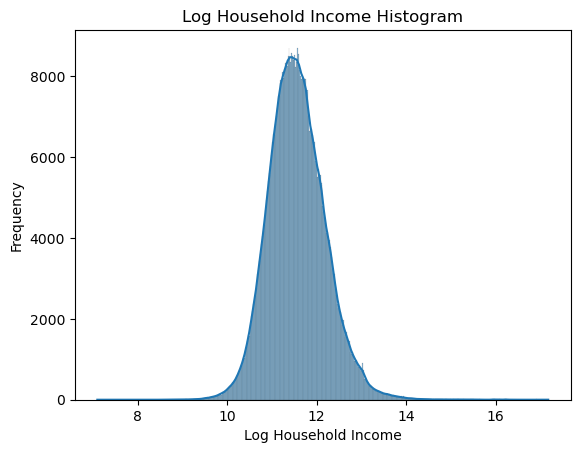

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_log_histogram(column):
    log_column = np.log(column)
    sns.histplot(log_column, kde=True)
    plt.xlabel("Log Household Income")
    plt.ylabel("Frequency")
    plt.title("Log Household Income Histogram")
    plt.show()

plot_log_histogram(santander['household_income'])
# Results: looks normally distributed, hence we can apply the mean values 

In [9]:
# Filling the NaN values with mean values
def fill_na_with_mean(column):
    mean_value = column.mean()
    return column.fillna(mean_value)

santander['household_income'] = fill_na_with_mean(santander['household_income'])

#### 3.1) Changing dtypes and datetime

In [10]:
# Transforming columns to string dtypes
string_columns = [
    'employee_index', 'country_residence', 'sex','customer_type_beginning_month', 'customer_relation_type_beginning_month',
    'residence_index', 'foreigner_index', 'channel_used',
    'deceased_index', 'segment'
]

for column in string_columns:
    santander[column] = santander[column].astype('string')

# Transforming wrong income column to int dtype
santander['household_income'] = pd.to_numeric(santander['household_income'], errors='coerce')

# Transforming wrong float columns to int dtype
int_columns = [
    'new_customer_index', 'customer_relation_type', 'address_type', 'province_code', 'activity_index', 'payroll', 'pensions_2'
]
for column in int_columns:
    santander[column] = santander[column].astype('int')

# Transforming date columns to datetime
santander['date'] = pd.to_datetime(santander['date'])

# Convert the 'account_open_date' column to datetime dtype
santander['account_open_date'] = pd.to_datetime(santander['account_open_date'])


##### 3.2) Removing Outliers

In [11]:
# We have a outlier in age with 164 and in seniority_months with -9999999
max_age_outlier = santander['age'].idxmax()

# Drop the rows containing the outliers
santander = santander.drop([max_age_outlier], axis=0)
santander = santander[santander['seniority_months'] != -999999.000000]

# Reset the index of the dataframe after dropping rows
santander = santander.reset_index(drop=True)

#### 3.4) Transforming the categorical columns with labelling

##### 3.4.1) Label encoding

In [12]:
santander['sex'] = santander['sex'].map({'H': 1, 'V': 0})
santander['residence_index'] = santander['residence_index'].map({'S': 1, 'N': 0})
santander['foreigner_index'] = santander['foreigner_index'].map({'S': 1, 'N': 0})
santander['deceased_index'] = santander['deceased_index'].map({'S': 1, 'N': 0})
santander['segment'] = santander['segment'].replace({
    '01 - TOP': "1",
    '02 - PARTICULARES': "2",
    '03 - UNIVERSITARIO': "3"
})
santander['segment'] = santander['segment'].astype('int')
santander['customer_type_beginning_month'] = santander['customer_type_beginning_month'].replace({
    'P': "3.0",
    '3': "4.0"
})
santander['customer_type_beginning_month'] = santander['customer_type_beginning_month'].astype('float')
santander['customer_type_beginning_month'] = santander['customer_type_beginning_month'].astype('int')
santander.head(10)

# We use label encoding also for country_residence and channel_used as they contain many different entries
santander["country_residence"] = santander["country_residence"].astype('category')
santander["country_residence"] = santander["country_residence"].cat.codes

santander["channel_used"] = santander["channel_used"].astype('category')
santander["channel_used"] = santander["channel_used"].cat.codes

##### 3.4.2) One-Hot-encoding 

In [13]:
# Get a copy of the dataset
santander1 = santander.copy()

# Employee_index
employee_index = pd.get_dummies(santander1['employee_index'], prefix='employee_index')
santander1 = santander1.drop('employee_index', axis=1)
santander1 = pd.concat([santander1, employee_index], axis=1)

# customer_type_beginning_month
customer_type_beginning_month = pd.get_dummies(santander1['customer_type_beginning_month'], prefix='customer_type_beginning_month')
santander1 = pd.concat([santander1, customer_type_beginning_month], axis=1)
dsantander1santander1f1 = santander1.drop('customer_type_beginning_month', axis=1)

# customer_relation_type_beginning_month
customer_relation_type_beginning_month = pd.get_dummies(santander1['customer_relation_type_beginning_month'], prefix='relation_type')
santander1 = pd.concat([santander1, customer_relation_type_beginning_month], axis=1)
santander1 = santander1.drop('customer_relation_type_beginning_month', axis=1)

#### 3.5) Adding new columns

In [14]:
santander1['tenure'] = (santander1['date'] - santander1['account_open_date']).dt.days

# Age segmentation
young_age = 30
middle_age = 60

def get_age_segment(age):
    if age < young_age:
        return '1'
    elif age < middle_age:
        return '2'
    else:
        return '3'

santander1['age_segment'] = santander1['age'].apply(get_age_segment) 

# Income segmentation
low_income = santander1['household_income'].mean() / 2
high_income = santander1['household_income'].mean() * 2

def get_income_segment(income):
    if income < low_income:
        return '1'
    elif income < high_income:
        return '2'
    else:
        return '3'

santander1['income_segment'] = santander1['household_income'].apply(get_income_segment)

# Total number of financial products
product_cols = ['saving_account', 'guarantees', 'current_accounts', 'derivada_account', 
                'payroll_account', 'junior_account', 'mas_particular_account', 'particular_account', 
                'particular_plus_account', 'short_term_deposits', 'medium_term_deposits', 
                'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions', 'loans', 
                'taxes', 'credit_card', 'securities', 'home_account', 'payroll', 'pensions_2', 
                'direct_debit']

santander1['total_products'] = santander1[product_cols].sum(axis=1)

In [15]:
santander1.head()

,date,customer_code,country_residence,sex,age,account_open_date,new_customer_index,seniority_months,customer_relation_type,customer_type_beginning_month,residence_index,foreigner_index,channel_used,deceased_index,address_type,province_code,activity_index,household_income,segment,saving_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions_2,direct_debit,employee_index_A,employee_index_B,employee_index_F,employee_index_N,employee_index_S,customer_type_beginning_month_1,customer_type_beginning_month_3,customer_type_beginning_month_4,relation_type_A,relation_type_I,relation_type_P,tenure,age_segment,income_segment,total_products
0,2016-05-28,657640,2,1,68,2006-11-17,0,114,1,1,1,0,21,0,1,28,0,147347.970000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,3480,3,2,0
1,2016-05-28,657788,2,1,42,2006-11-18,0,114,1,1,1,0,33,0,1,28,1,132559.350000,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,3479,2,2,1
2,2016-05-28,657795,2,0,44,2006-11-18,0,114,1,1,1,0,20,0,1,26,1,81399.570000,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,3479,2,2,1
3,2016-05-28,657790,2,0,42,2006-11-18,0,114,1,1,1,0,33,0,1,48,1,133985.446681,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,3479,2,2,6
4,2016-05-28,657794,2,1,49,2006-11-18,0,114,1,1,1,0,24,0,1,8,1,102189.000000,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,3479,2,2,2


#### 3.6) Removing the datetime columns and deceased entries with 1 

In [16]:
# Removing datetime 
santander1 = santander1.drop(columns=['date'])
santander1 = santander1.drop(columns=['account_open_date'])

# Removing the rows where the deceased column value equals = 1
santander1 = santander1[santander1['deceased_index'] != -1]

# Dropping the deceased column as it now only contains zeros and is redundant 
santander1 = santander1.drop(columns=['deceased_index'])

## 4) Saving the cleaned dataset for model testing

In [17]:
santander_model = santander1.copy()

In [19]:
santander_model.describe()

,customer_code,country_residence,sex,age,new_customer_index,seniority_months,customer_relation_type,customer_type_beginning_month,residence_index,foreigner_index,channel_used,address_type,province_code,activity_index,household_income,segment,saving_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions_2,direct_debit,employee_index_A,employee_index_B,employee_index_F,employee_index_N,employee_index_S,customer_type_beginning_month_1,customer_type_beginning_month_3,customer_type_beginning_month_4,relation_type_A,relation_type_I,relation_type_P,tenure,total_products
count,9.203920e+05,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.0,920392.00000,920392.000000,9.203920e+05,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000,920392.000000
mean,8.799403e+05,2.000000,0.457864,40.076188,0.032171,80.007151,1.145234,1.000011,0.999996,0.046159,106.946902,1.0,26.54526,0.425825,1.339853e+05,2.337818,0.000085,0.000016,0.605245,0.000342,0.079278,0.008195,0.008557,0.108355,0.036018,0.000341,0.001094,0.033779,0.082079,0.015818,0.004907,0.007946,0.002159,0.049329,0.037686,0.022993,0.003211,0.052431,0.057347,0.122455,0.000160,0.000236,0.000164,0.999439,0.000001,0.999996,0.000002,0.000002,0.421537,0.578459,0.000004,2489.417876,1.339668
std,4.463632e+05,0.003296,0.498222,17.167550,0.176454,67.211062,3.769858,0.005315,0.002085,0.209829,54.899384,0.0,12.83907,0.494468,2.027279e+05,0.547895,0.009205,0.004037,0.488798,0.018497,0.270173,0.090157,0.092109,0.310828,0.186336,0.018467,0.033059,0.180660,0.274485,0.124772,0.069875,0.088783,0.046413,0.216554,0.190436,0.149883,0.056571,0.222895,0.232505,0.327811,0.012637,0.015353,0.012808,0.023671,0.001042,0.002085,0.001474,0.001474,0.493805,0.493806,0.002085,2058.543060,1.482604
min,1.588900e+04,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.00000,0.000000,1.202730e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000
25%,4.860718e+05,2.000000,0.000000,25.000000,0.000000,22.000000,1.000000,1.000000,1.000000,0.000000,24.000000,1.0,15.00000,0.000000,7.791230e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,691.000000,1.000000
50%,9.676485e+05,2.000000,0.000000,38.000000,0.000000,54.000000,1.000000,1.000000,1.000000,0.000000,122.000000,1.0,28.00000,0.000000,1.302116e+05,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1667.000000

In [20]:
santander_model.dtypes

customer_code                        int64
country_residence                     int8
sex                                  int64
age                                  int64
new_customer_index                   int64
seniority_months                     int64
customer_relation_type               int64
customer_type_beginning_month        int64
residence_index                      int64
foreigner_index                      int64
channel_used                         int16
address_type                         int64
province_code                        int64
activity_index                       int64
household_income                   float64
segment                              int64
saving_account                       int64
guarantees                           int64
current_accounts                     int64
derivada_account                     int64
payroll_account                      int64
junior_account                       int64
mas_particular_account               int64
particular_

In [21]:
santander_model.isna().sum()

customer_code                      0
country_residence                  0
sex                                0
age                                0
new_customer_index                 0
seniority_months                   0
customer_relation_type             0
customer_type_beginning_month      0
residence_index                    0
foreigner_index                    0
channel_used                       0
address_type                       0
province_code                      0
activity_index                     0
household_income                   0
segment                            0
saving_account                     0
guarantees                         0
current_accounts                   0
derivada_account                   0
payroll_account                    0
junior_account                     0
mas_particular_account             0
particular_account                 0
particular_plus_account            0
short_term_deposits                0
medium_term_deposits               0
l

In [22]:
santander_model.to_csv("Santander_model.csv", index=False)

## 5) Building the model

In [24]:
model_df = pd.read_csv("Santander_model.csv", low_memory=False)

#### 5.1) Model 1 Random forrest

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, hamming_loss, accuracy_score

# Preprocess the data
product_columns = ['saving_account', 'guarantees', 'current_accounts', 'derivada_account', 'payroll_account', 'junior_account', 'mas_particular_account', 'particular_account', 'particular_plus_account', 'short_term_deposits', 'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities', 'home_account', 'payroll', 'pensions_2', 'direct_debit']
feature_columns = [col for col in model_df.columns if col not in product_columns]

X = model_df[feature_columns]
y = model_df[product_columns]

# Scale numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1 Score: ", f1)
print("Hamming Loss: ", hamming)
print("Accuracy: ", accuracy)


F1 Score:  0.7121252506881726
Hamming Loss:  0.02622809590809743
Accuracy:  0.7308057953378713


#### 5.2) Model 2: Classification

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming the provided dataframe is named 'data'
# Feature columns
feature_columns = [
    'tenure',
    'age_segment',
    'income_segment'
] + product_cols

# Target column
target_column = 'satisfied'

# Create the target column
model_df[target_column] = model_df.apply(lambda row: 1 if row['seniority_months'] >= 60 else 0, axis=1)

# Split data into train and test sets
X = model_df[feature_columns]
y = model_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    154756
           1       0.98      0.98      0.98    121362

    accuracy                           0.98    276118
   macro avg       0.98      0.98      0.98    276118
weighted avg       0.98      0.98      0.98    276118

